### Set up environment

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [47]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]

# Function to calculate PDF from a single file
def calculate_pdf_wetvalues (precipitation_data,bins_i_want, filter_small_vals=False ):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres

In [ ]:
# Create patches
patches= []
patch1 = mpatches.Patch(color= 'black', label='CEH-GEAR')
patch2 = mpatches.Patch(color= 'darkorange', label='UKCP18 (hourly)')
patch3 = mpatches.Patch(color= 'purple', label='UKCP18 (30 mins)')
patch4 = mpatches.Patch(color= 'green', label='NIMROD')
patches.append(patch1)
patches.append(patch2)
patches.append(patch3)
patches.append(patch4)

In [48]:
resolution = '12km'

### Get model data for overlapping and not overlapping time periods

In [92]:
ukcp18_hrly_2001_2014_jja_GB = np.load('/nfs/a319/gy17m2a/PhD/datadir/PDF_Plotting/ukcp18_hrly_2001_2014_jja_GB.npy')
ukcp18_hrly_2001_2019_jja_GB = np.load('/nfs/a319/gy17m2a/PhD/datadir/PDF_Plotting/ukcp18_hrly_2001_2019_jja_GB.npy')
ukcp18_hrly_2006_2019_jja_GB = np.load('/nfs/a319/gy17m2a/PhD/datadir/PDF_Plotting/ukcp18_hrly_2006_2019_jja_GB.npy')

In [54]:
cehgear_1990_2014_GB_jja= np.load('/nfs/a319/gy17m2a/PhD/datadir/PDF_Plotting/cehgear_1990-2014_GB_jja.npy')
cehgear_2001_2014_GB_jja = np.load('/nfs/a319/gy17m2a/PhD/datadir/PDF_Plotting/cehgear_2001-2014_GB_jja.npy')

In [61]:
ukcp18_30m_2001_2014_jja_GB = np.load('/nfs/a319/gy17m2a/PhD/datadir/PDF_Plotting/ukcp18_30m_2001_2014_jja_GB.npy')
ukcp18_30m_2001_2019_jja_GB = np.load('/nfs/a319/gy17m2a/PhD/datadir/PDF_Plotting/ukcp18_30m_2001_2019_jja_GB.npy')
ukcp18_30m_2006_2019_jja_GB = np.load('/nfs/a319/gy17m2a/PhD/datadir/PDF_Plotting/ukcp18_30m_2006_2019_jja_GB.npy')

In [56]:
NIMROD_2006_2019_jja_GB = np.load('/nfs/a319/gy17m2a/PhD/datadir/PDF_Plotting/NIMROD_2006_2019_jja_GB.npy')

## Calculate CDFs and CCDFs

In [11]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50,  np.nanmax(ukcp18_hrly_2001_2014_jja_GB)]
low_bins_i_want = [0, 0.1,  0.95, 1.05, 1.15,2]

## UKCP18 hrly vs UKCP18 30 mins vs NIMROD : 2006-2019

In [89]:
ukcp18_hrly_cdf, ukcp18_hrly_ccdf, ukcp18_hrly_bin_centres, ukcp18_hrly_bin_edges = calculate_ccdf_wetvalues(ukcp18_hrly_2006_2019_jja_GB,bins_i_want)
ukcp18_30mins_cdf, ukcp18_30mins_ccdf, ukcp18_30mins_bin_centres, ukcp18_30mins_bin_edges = calculate_ccdf_wetvalues(ukcp18_30m_2006_2019_jja_GB, bins_i_want)
nimrod_cdf, nimrod_ccdf, nimrod_bin_centres, nimrod_bin_edges = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB,bins_i_want)

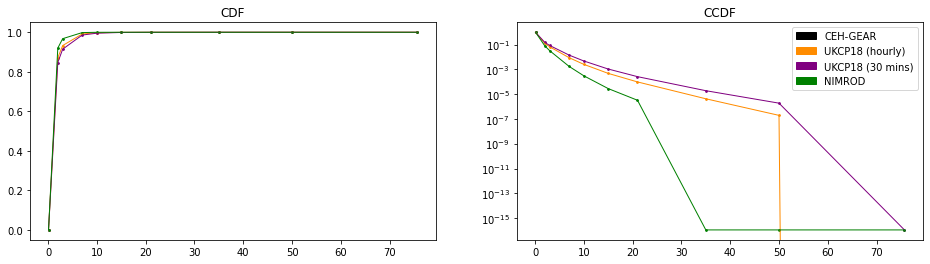

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
axs[0].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_cdf ,linewidth = 1, color = 'darkorange')
axs[0].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_cdf ,linewidth = 1,s=3, color = 'purple')
axs[0].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_cdf ,linewidth = 1, color = 'purple')
axs[0].scatter(nimrod_bin_edges, nimrod_cdf ,linewidth = 1,s=3, color = 'green')
axs[0].plot(nimrod_bin_edges, nimrod_cdf ,linewidth = 1, color = 'green')
axs[0].set_title('CDF')

axs[1].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_ccdf ,linewidth = 1,s=3, color = 'darkorange')
axs[1].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_ccdf ,linewidth = 1, color = 'darkorange')
axs[1].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_ccdf ,linewidth = 1,s=3, color = 'purple')
axs[1].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_ccdf ,linewidth = 1, color = 'purple')
axs[1].scatter(nimrod_bin_edges, nimrod_ccdf ,linewidth = 1,s=3, color = 'green')
axs[1].plot(nimrod_bin_edges, nimrod_ccdf ,linewidth = 1, color = 'green')
axs[1].set_yscale('log')
# axs[1].set_xlim(0,80)
# axs[1].set_ylim(1e-7,1)
axs[1].set_title('CCDF')

axs[1].legend(handles=patches);

## UKCP18 hrly vs UKCP18 30 mins vs CEH-GEAR : 2001-2014

In [93]:
cehgear_cdf, cehgear_ccdf, cehgear_bin_centres, cehgear_bin_edges = calculate_ccdf_wetvalues(cehgear_2001_2014_GB_jja, bins_i_want)
ukcp18_hrly_cdf, ukcp18_hrly_ccdf, ukcp18_hrly_bin_centres, ukcp18_hrly_bin_edges = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2014_jja_GB,bins_i_want)
ukcp18_30mins_cdf, ukcp18_30mins_ccdf, ukcp18_30mins_bin_centres, ukcp18_30mins_bin_edges = calculate_ccdf_wetvalues(ukcp18_30m_2001_2014_jja_GB, bins_i_want)

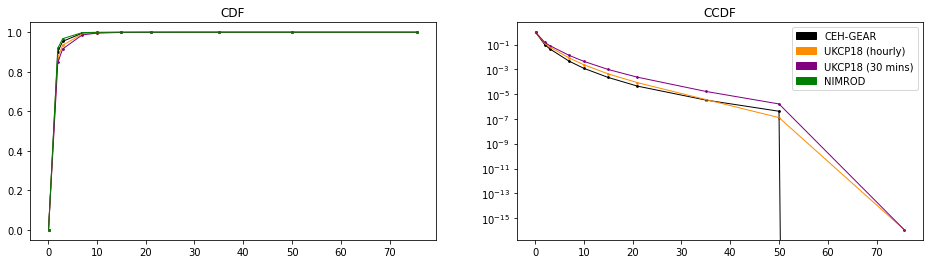

In [94]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
axs[0].scatter(cehgear_bin_edges, cehgear_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(cehgear_bin_edges,cehgear_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_cdf ,linewidth = 1, color = 'darkorange')
axs[0].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_cdf ,linewidth = 1,s=3, color = 'purple')
axs[0].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_cdf ,linewidth = 1, color = 'purple')
axs[0].scatter(nimrod_bin_edges, nimrod_cdf ,linewidth = 1,s=3, color = 'green')
axs[0].plot(nimrod_bin_edges, nimrod_cdf ,linewidth = 1, color = 'green')
axs[0].set_title('CDF')

axs[1].scatter(cehgear_bin_edges, cehgear_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(cehgear_bin_edges,cehgear_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_ccdf ,linewidth = 1,s=3, color = 'darkorange')
axs[1].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_ccdf ,linewidth = 1, color = 'darkorange')
axs[1].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_ccdf ,linewidth = 1,s=3, color = 'purple')
axs[1].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_ccdf ,linewidth = 1, color = 'purple')
axs[1].set_yscale('log')
# axs[1].set_xlim(0,80)
# axs[1].set_ylim(1e-7,1)
axs[1].set_title('CCDF')

axs[1].legend(handles=patches);

## All

In [95]:
ukcp18_hrly_cdf, ukcp18_hrly_ccdf, ukcp18_hrly_bin_centres, ukcp18_hrly_bin_edges = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2019_jja_GB,bins_i_want)
ukcp18_30mins_cdf, ukcp18_30mins_ccdf, ukcp18_30mins_bin_centres, ukcp18_30mins_bin_edges = calculate_ccdf_wetvalues(ukcp18_30m_2001_2019_jja_GB, bins_i_want)
nimrod_cdf, nimrod_ccdf, nimrod_bin_centres, nimrod_bin_edges = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB,bins_i_want)
cehgear_cdf, cehgear_ccdf, cehgear_bin_centres, cehgear_bin_edges = calculate_ccdf_wetvalues(cehgear_1990_2014_GB_jja, bins_i_want)

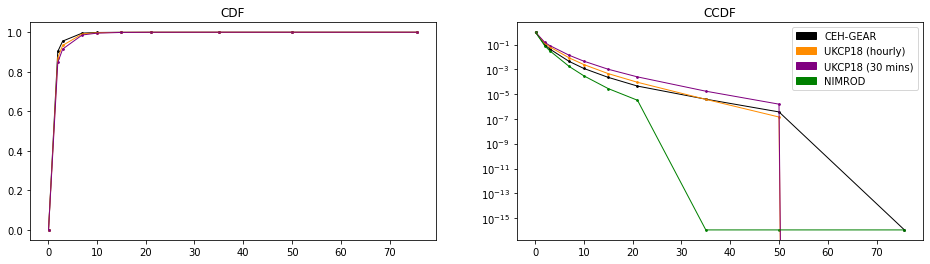

In [96]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
axs[0].scatter(cehgear_bin_edges, cehgear_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(cehgear_bin_edges,cehgear_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_cdf ,linewidth = 1, color = 'darkorange')
axs[0].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_cdf ,linewidth = 1,s=3, color = 'purple')
axs[0].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_cdf ,linewidth = 1, color = 'purple')
axs[0].set_title('CDF')

axs[1].scatter(cehgear_bin_edges, cehgear_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(cehgear_bin_edges,cehgear_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_ccdf ,linewidth = 1,s=3, color = 'darkorange')
axs[1].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_ccdf ,linewidth = 1, color = 'darkorange')
axs[1].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_ccdf ,linewidth = 1,s=3, color = 'purple')
axs[1].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_ccdf ,linewidth = 1, color = 'purple')
axs[1].scatter(nimrod_bin_edges, nimrod_ccdf ,linewidth = 1,s=3, color = 'green')
axs[1].plot(nimrod_bin_edges, nimrod_ccdf ,linewidth = 1, color = 'green')
axs[1].set_yscale('log')
# axs[1].set_xlim(0,80)
# axs[1].set_ylim(1e-7,1)
axs[1].set_title('CCDF')

axs[1].legend(handles=patches);